# Simulation data Analytics

## Imports

In [1]:
import os
from functools import reduce
from itertools import zip_longest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
# UUID = '526a9ccf-2e94-479c-9f87-2c969fd09f3b (isolation, mask, vaccine)'
# UUID = '04c3d7f1-c80e-4843-b56f-d9e221763f99 (isolation)'
# UUID = '323cd3e1-8442-4500-adca-be75c1b3955a (null)'
UUID = 'c0758719-d9a1-4ee6-8d45-a7841167d6bf'
FOLDER_DIR = os.path.join('..', 'dist', 'results', UUID)

In [3]:
cells = pd.read_csv(os.path.join(FOLDER_DIR, 'sheet', 'cells.csv'))
steps = pd.read_csv(os.path.join(FOLDER_DIR, 'sheet', 'steps.csv'))
prevt = pd.read_csv(os.path.join(FOLDER_DIR, 'sheet', 'prevt.csv'))

In [4]:
def add_vertical_lines():
    for column, color in zip(prevt.columns, ['y', 'b', 'g']):
        value = prevt.loc[0, column]
        if not value:
            continue
        plt.axvline(x=prevt.loc[0, column], color=color, label=column, linewidth=3)

## Create filtered data

In [5]:
def apply_first_time(condition: str):
    
    def apply(col: pd.Series):
        col_copy = col.copy()
        col_copy.values[:] = 0
        
        if condition in col.unique():
            col_copy[np.argmax((col == condition))] = 1
        return col_copy
    
    return apply

In [6]:
infected = steps.applymap(lambda x: x in ('EXPOSED', 'INFECTOUS'))

In [7]:
dead = steps.applymap(lambda x: x in ('DEAD'))

In [8]:
infected_by_day = steps.apply(apply_first_time('EXPOSED'))

In [9]:
dead_by_day = steps.apply(apply_first_time('DEAD'))

In [10]:
dead_by_age = dead.copy()
dead_by_age.columns = cells.age.astype(int)
dead_by_age = dead_by_age.sum(axis=0).groupby('age').sum().sort_index()

### Pessoas contaminadas

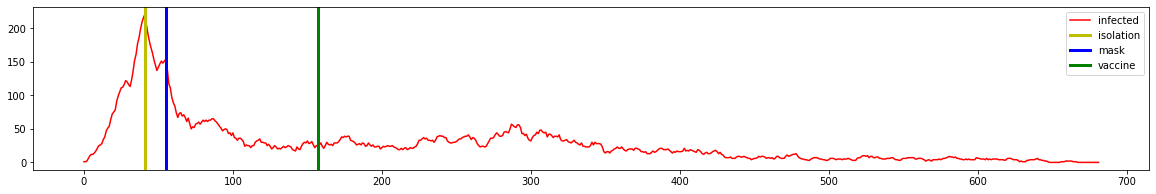

In [11]:
plt.figure(figsize=(20,3))
data = infected.sum(axis=1)

plt.plot(data.values, color='r', label='infected')
add_vertical_lines()
plt.legend()

### Pessoas contaminadas por dia

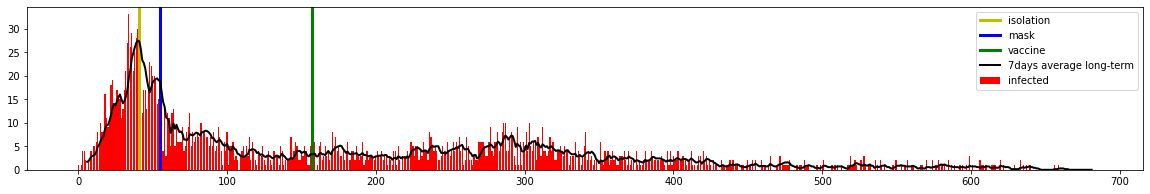

In [12]:
plt.figure(figsize=(20,3))
data = infected_by_day.sum(axis=1)
rolling = data.rolling(7).mean()

plt.bar(data.index, data.values, color='r', label='infected')
add_vertical_lines()
plt.plot(rolling, color='black', label='7days average long-term', linewidth=2)
plt.legend()

### Pessoas mortas acumuladas

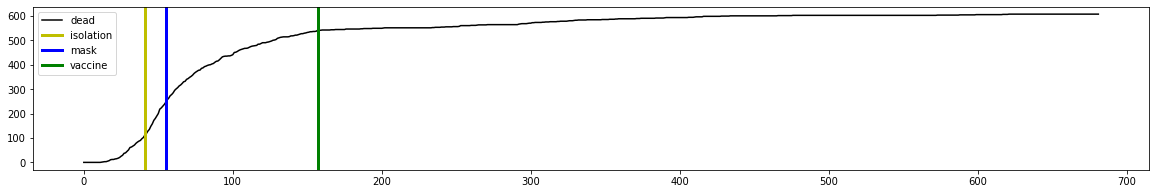

In [13]:
plt.figure(figsize=(20,3))
data = dead.sum(axis=1)

plt.plot(data.values, color='black', label='dead')
add_vertical_lines()
plt.legend()

### Pessoas mortas por dia

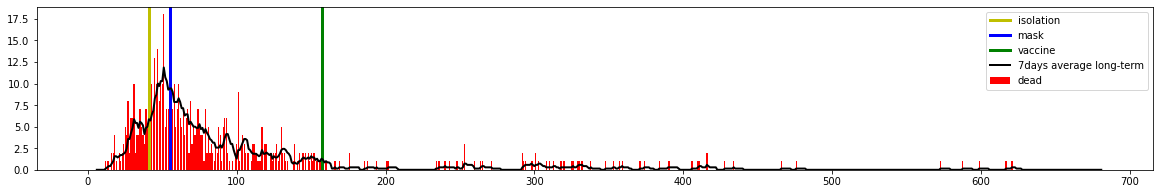

In [14]:
plt.figure(figsize=(20,3))
data = dead_by_day.sum(axis=1)
rolling = data.rolling(7).mean()

plt.bar(data.index, data.values, color='r', label='dead')
add_vertical_lines()
plt.plot(rolling, color='black', label='7days average long-term', linewidth=2)
plt.legend()

### Pessoas mortas por idade

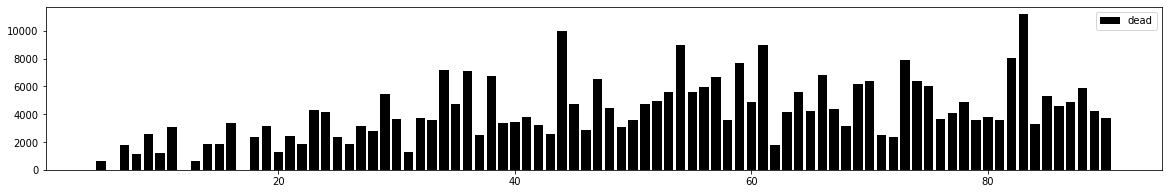

In [15]:
plt.figure(figsize=(20,3))
data = dead_by_age

plt.bar(data.index, data.values, color='black', label='dead')
plt.legend()